In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
# df=pd.read_csv('/content/machine_failure.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv('/content/drive/MyDrive/machine_failure.csv')

# **Pre-Processing**

In [5]:
df.shape

(10000, 9)

In [6]:
l=[]

In [7]:
for i in range(10000):
  l.append(np.random.randint(0,20))

In [8]:
df['current']=l

In [9]:
df.shape


(10000, 10)

In [10]:
df


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,current
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,10
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,7
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,6
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,6
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,8
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,2
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,5
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,7
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,14


In [11]:
l=[]

In [12]:
for i in range(10000):
  l.append(np.random.randint(1,6))

In [13]:
df['vibration'] =l

In [14]:
df.shape

(10000, 11)

In [15]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,current,vibration
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,10,4
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,7,2
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,6,4
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,6,5
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,8,4
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,2,3
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,5,3
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,7,5
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,14,5


# **Data is unbalanced**

In [16]:
df['Machine failure'].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [17]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,current,vibration
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,10,4
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,7,2
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,6,4
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,6,5
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,8,4
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,2,3
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,5,3
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,7,5
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,14,5


In [18]:
#df.to_csv('updated_data.csv')

# **Normalization**

In [19]:
# Perform one-hot encoding for the 'Type' column
df_encoded = pd.get_dummies(df, columns=['Type'], prefix=['Type'])

Make a type as encoded

In [20]:
df_encoded

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,current,vibration,Type_H,Type_L,Type_M
0,1,M14860,298.1,308.6,1551,42.8,0,0,10,4,0,0,1
1,2,L47181,298.2,308.7,1408,46.3,3,0,7,2,0,1,0
2,3,L47182,298.1,308.5,1498,49.4,5,0,6,4,0,1,0
3,4,L47183,298.2,308.6,1433,39.5,7,0,6,5,0,1,0
4,5,L47184,298.2,308.7,1408,40.0,9,0,8,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,298.8,308.4,1604,29.5,14,0,2,3,0,0,1
9996,9997,H39410,298.9,308.4,1632,31.8,17,0,5,3,1,0,0
9997,9998,M24857,299.0,308.6,1645,33.4,22,0,7,5,0,0,1
9998,9999,H39412,299.0,308.7,1408,48.5,25,0,14,5,1,0,0


In [21]:
# Define features (X) and target (y)
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'current', 'vibration','Type_H','Type_L','Type_M']
X = df_encoded[features]
y = df_encoded['Machine failure']

Data is not proper so make a under sampling

In [22]:
from imblearn.under_sampling import RandomUnderSampler
# Create a RandomUnderSampler instance
undersampler = RandomUnderSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [23]:
# Create a new balanced DataFrame
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

In [24]:
# Check the class distribution after undersampling
print(balanced_df['Machine failure'].value_counts())

0    339
1    339
Name: Machine failure, dtype: int64


In [25]:
balanced_df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],current,vibration,Type_H,Type_L,Type_M,Machine failure
0,301.0,310.9,1473,44.2,116,6,1,0,1,0,0
1,297.2,308.3,1419,39.7,115,15,1,0,1,0,0
2,299.7,309.1,1417,50.1,187,7,4,0,1,0,0
3,302.2,311.5,1482,42.6,16,11,1,1,0,0,0
4,302.3,311.0,1657,31.1,3,12,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
673,298.6,309.8,2271,16.2,218,14,2,0,1,0,1
674,298.5,309.5,1294,66.7,12,18,2,0,1,0,1
675,298.5,309.4,1360,60.9,187,6,1,0,1,0,1
676,298.3,309.3,1337,56.1,206,3,2,0,1,0,1


# **SVM**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [27]:

# Define features (X) and target (y)
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'current', 'vibration','Type_H','Type_L','Type_M']
X = balanced_df[features]
y = balanced_df['Machine failure']

In [28]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [30]:
X_train_scaled

array([[ 0.88431826,  0.50608579, -0.44198786, ..., -0.30453561,
         0.73469227, -0.60150565],
       [-0.71901842, -0.06167307,  0.25027508, ..., -0.30453561,
         0.73469227, -0.60150565],
       [ 0.05835694,  1.28675423,  0.56024356, ..., -0.30453561,
         0.73469227, -0.60150565],
       ...,
       [-0.03881498, -0.3455525 , -0.13890756, ..., -0.30453561,
         0.73469227, -0.60150565],
       [ 1.03007614,  0.93190494,  0.4190357 , ...,  3.28368828,
        -1.36111409, -0.60150565],
       [-0.18457286,  0.78996522,  0.58090813, ..., -0.30453561,
         0.73469227, -0.60150565]])

In [31]:
# Create and train an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = svm_classifier.predict(X_test_scaled)

In [32]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

In [33]:
print(f'Accuracy: {accuracy*100} % ')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_report}')

Accuracy: 80.88235294117648 % 
Confusion Matrix:
[[59 17]
 [ 9 51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82        76
           1       0.75      0.85      0.80        60

    accuracy                           0.81       136
   macro avg       0.81      0.81      0.81       136
weighted avg       0.82      0.81      0.81       136



# **SVM Accuracy,ROC curve, precision_recall_curve**

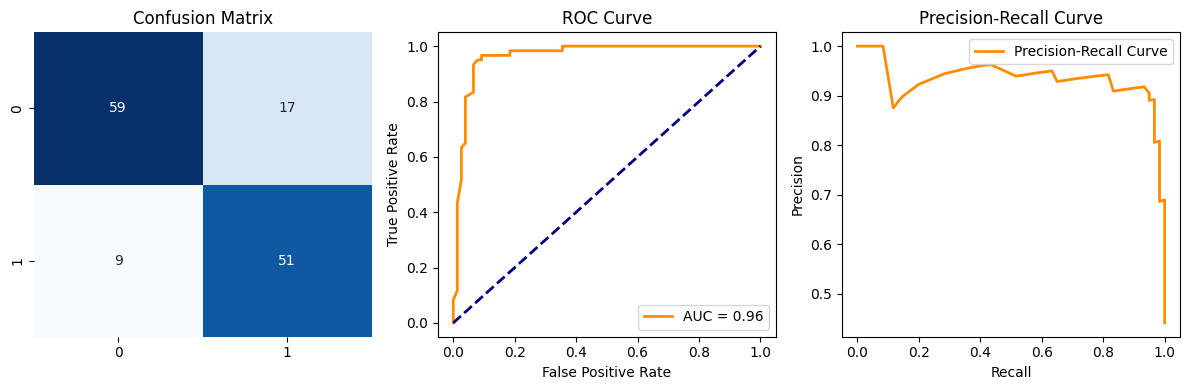

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier  # Import a classifier, e.g., RandomForestClassifier

# Assuming you have trained a classifier (e.g., RandomForestClassifier) and X_train, y_train
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Assuming you have trained a classifier (e.g., clf) and X_test
y_probs = clf.predict_proba(X_test)[:, 1]

# Confusion Matrix Heatmap
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')

# ROC Curve
plt.subplot(1, 3, 2)
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Precision-Recall Curve
plt.subplot(1, 3, 3)
precision, recall, _ = precision_recall_curve(y_test, y_probs)
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


**fast api**

In [35]:
!pip install fastapi uvicorn
!pip install ColabCode

In [36]:
!pip install fastapi==0.99.0 uvicorn

In [37]:
from colabcode import ColabCode
from fastapi import FastAPI

In [38]:
cc=ColabCode(port=1200,code=False)
app=FastAPI()

In [39]:
# @title Default title text

@app.get("/")
def read_root():
    return {"Hello": "World"}

**SVM FAST API**

In [40]:
from pydantic import BaseModel
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
import io
import base64
from fastapi.responses import JSONResponse
from IPython.display import Image

import tempfile
import os


@app.get("/SVM")
def read_root():

    # Assuming you have trained a classifier (e.g., RandomForestClassifier)
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)

    # Assuming you have trained a classifier (e.g., clf) and X_test
    y_probs = clf.predict_proba(X_test)[:, 1]


    # Assuming you have trained a classifier (e.g., clf) and X_test

    # Confusion Matrix Heatmap
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')

    # ROC Curve
    plt.subplot(1, 3, 2)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

    # Precision-Recall Curve
    plt.subplot(1, 3, 3)
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='upper right')

    # Save the plot to a temporary file
    with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as tmpfile:
        plt.tight_layout()
        plt.savefig(tmpfile.name, format='png')
        tmpfile.seek(0)
        plt.close()

    # Convert the image to base64
    with open(tmpfile.name, "rb") as img_file:
        base64_image = base64.b64encode(img_file.read()).decode('utf-8')

    # Remove the temporary file
    os.unlink(tmpfile.name)
    return JSONResponse({
        "image_url": f"data:image/png;base64,{base64_image} ",
        "accuracy": accuracy * 100
      })


# **Logistic Regression**

In [41]:
# import the necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# # load the breast cancer dataset
# X, y = load_breast_cancer(return_X_y=True)
# # split the train and test dataset
X_train_scaled, X_test_scaled,\
	y_train, y_test = train_test_split(X, y,
									test_size=0.20,
									random_state=23)
# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train_scaled, y_train)
# Prediction
y_pred = clf.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)


Logistic Regression model accuracy (in %): 82.35294117647058


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Logistic Regression roc curve**

In [42]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc

# # Assuming you have X_test_scaled, y_test, and clf from your code

# # Get predicted probabilities for the positive class
# y_probs = clf.predict_proba(X_test_scaled)[:, 1]

# # Compute ROC curve and area under the curve
# fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# roc_auc = auc(fpr, tpr)

# # Plot ROC curve
# plt.figure(figsize=(5, 2))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()


**Logistic regression FAST API**

In [43]:
from fastapi.responses import FileResponse
from pydantic import BaseModel
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import io
import base64

@app.get("/logistic_roc_curve")
def logistic_roc_curve():
#  Get predicted probabilities for the positive class
  y_probs = clf.predict_proba(X_test_scaled)[:, 1]

  # Compute ROC curve and area under the curve
  fpr, tpr, thresholds = roc_curve(y_test, y_probs)
  roc_auc = auc(fpr, tpr)

  # Plot ROC curve
  plt.figure(figsize=(5, 2))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')

  # Save the plot to a BytesIO buffer
  buffer = io.BytesIO()
  plt.savefig(buffer, format='png')
  buffer.seek(0)
  plt.close()

  # Convert the image to base64 and return it
  base64_image = base64.b64encode(buffer.read()).decode('utf-8')
  return {
        "image_url": f"data:image/png;base64,{base64_image} ",
        "accuracy": acc*100
      }

# **KNN**

In [44]:
df_encoded


,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,current,vibration,Type_H,Type_L,Type_M
0,1,M14860,298.1,308.6,1551,42.8,0,0,10,4,0,0,1
1,2,L47181,298.2,308.7,1408,46.3,3,0,7,2,0,1,0
2,3,L47182,298.1,308.5,1498,49.4,5,0,6,4,0,1,0
3,4,L47183,298.2,308.6,1433,39.5,7,0,6,5,0,1,0
4,5,L47184,298.2,308.7,1408,40.0,9,0,8,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,298.8,308.4,1604,29.5,14,0,2,3,0,0,1
9996,9997,H39410,298.9,308.4,1632,31.8,17,0,5,3,1,0,0
9997,9998,M24857,299.0,308.6,1645,33.4,22,0,7,5,0,0,1
9998,9999,H39412,299.0,308.7,1408,48.5,25,0,14,5,1,0,0


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Separate features and target variable
X = df_encoded.drop(['Machine failure','Product ID','UDI'], axis=1)
y = df_encoded['Machine failure']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can experiment with different values of k
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy*100} %')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_report}')


Accuracy: 97.2 %
Confusion Matrix:
[[1930    9]
 [  47   14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.61      0.23      0.33        61

    accuracy                           0.97      2000
   macro avg       0.79      0.61      0.66      2000
weighted avg       0.97      0.97      0.97      2000



# **KNN confusion Matrix**

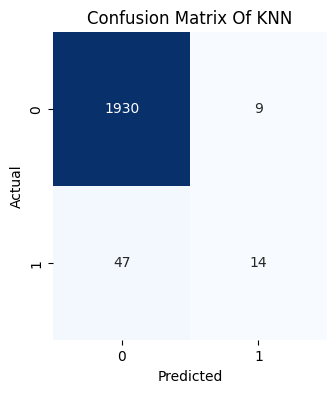

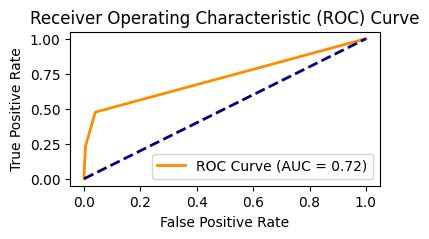

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Confusion Matrix Heatmap
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Of KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_probs = knn_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(4, 2))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**API for KNN confusion matrix and roc**

In [47]:
from fastapi.responses import FileResponse
from pydantic import BaseModel
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import io
import base64

@app.get("/knn_matrix_roc")
async def compute_roc():
    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(5, 2))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    # Save the plot to a BytesIO buffer
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)
    plt.close()

    # Convert the image to base64 and return it
    base64_image = base64.b64encode(buffer.read()).decode('utf-8')

    # return {"image_url": f"data:image/png;base64,{base64_image}"}
    return {
        "image_url": f"data:image/png;base64,{base64_image} ",
        "accuracy":accuracy*100
      }

# **Accuracy Comaprison graph**

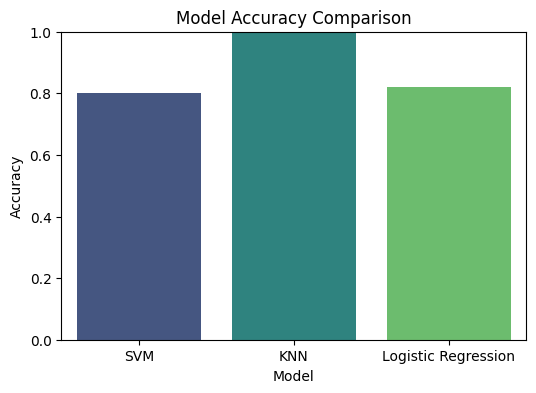

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have accuracy scores for SVM, k-Nearest Neighbors, and Logistic Regression
svm_accuracy = 0.8014
knn_accuracy = 0.999
logistic_accuracy =0.82

# Create a DataFrame for better visualization
model_names = ['SVM', 'KNN', 'Logistic Regression']
accuracy_scores = [svm_accuracy, knn_accuracy, logistic_accuracy]

accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores})

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Assuming accuracy is on a scale from 0 to 1
plt.show()

**Accuracy comaprison graph display API**

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
# Accuracy Comaprison graph

@app.get("/accu_comp_graph")
async def accu_comp_graph():

# Assuming you have accuracy scores for SVM, k-Nearest Neighbors, and Logistic Regression
    svm_accuracy = 0.8014
    knn_accuracy = 0.999
    logistic_accuracy =0.82

    # Create a DataFrame for better visualization
    model_names = ['SVM', 'KNN', 'Logistic Regression']
    accuracy_scores = [svm_accuracy, knn_accuracy, logistic_accuracy]

    accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores})

    # Create a bar plot
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
    plt.title('Model Accuracy Comparison')
    plt.ylim(0, 1)  # Assuming accuracy is on a scale from 0 to 1

    # Save the plot to a BytesIO buffer
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)
    plt.close()

    # Convert the image to base64 and return it
    base64_image = base64.b64encode(buffer.read()).decode('utf-8')

    return {"image_url": f"data:image/png;base64,{base64_image}"}


# **RUN THIS FOR GET URL**

In [ ]:
cc.run_app(app=app)

INFO:     Started server process [12382]
INFO:uvicorn.error:Started server process [12382]
INFO:     Waiting for application startup.
INFO:uvicorn.error:Waiting for application startup.
INFO:     Application startup complete.
INFO:uvicorn.error:Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:1200 (Press CTRL+C to quit)
INFO:uvicorn.error:Uvicorn running on http://127.0.0.1:1200 (Press CTRL+C to quit)


Public URL: NgrokTunnel: "https://76be-34-147-117-157.ngrok.io" -> "http://localhost:1200"
INFO:     14.139.122.120:0 - "GET / HTTP/1.1" 200 OK
INFO:     14.139.122.120:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     14.139.122.120:0 - "GET /SVM HTTP/1.1" 200 OK
INFO:     49.44.84.136:0 - "GET /SVM HTTP/1.1" 200 OK
INFO:     14.139.122.120:0 - "GET /knn_matrix_roc HTTP/1.1" 200 OK
